<a href="https://colab.research.google.com/github/OSAKAAI/DEEP_LEARNING/blob/main/CNN_For_Rice_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Rice.zip"

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Rice_dataset')

In [ ]:
data_dir = "/content/Rice_dataset/Rice_Image_Dataset"
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


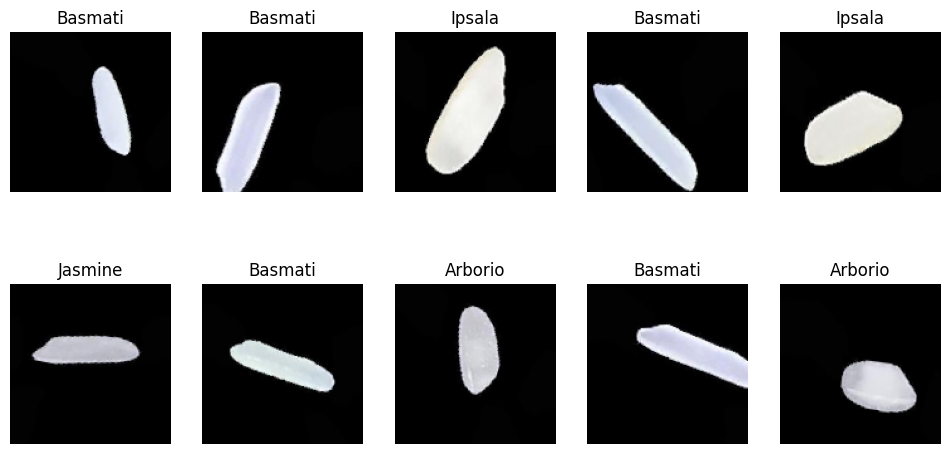

In [ ]:
images, labels = next(iter(train_data))

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation="softmax")  # 5 classes- Arborio, Basmati , Ipsala, Jasmine, Karacadag
])

model.summary();


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 361s 189ms/step - accuracy: 0.7132 - loss: 0.6912 - val_accuracy: 0.9724 - val_loss: 0.0989
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 347s 185ms/step - accuracy: 0.9454 - loss: 0.1586 - val_accuracy: 0.9614 - val_loss: 0.1013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 358s 191ms/step - accuracy: 0.9626 - loss: 0.1125 - val_accuracy: 0.9845 - val_loss: 0.0489
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 364s 194ms/step - accuracy: 0.9718 - loss: 0.0882 - val_accuracy: 0.9904 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 351s 187ms/step - accuracy: 0.9767 - loss: 0.0755 - val_accuracy: 0.9829 - val_loss: 0.0514


In [ ]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 146ms/step - accuracy: 0.9830 - loss: 0.0541
Validation Accuracy: 98.30%


In [ ]:
model.save("rice_model.h5")   #Saving the model for future use


In [ ]:
# Testing for a single image and predicting its class

import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("/content/Rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (10005).jpg", target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)
print("Predicted class:", list(train_data.class_indices.keys())[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Predicted class: Karacadag


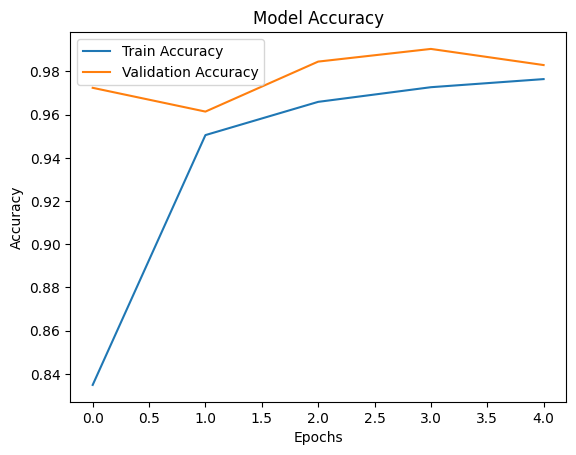

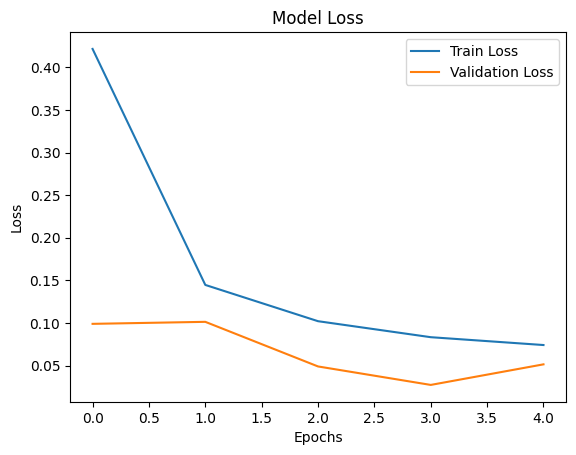

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

print()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
